


# Project: Investigate a Dataset - Medical Appointment No Shows
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



>This dataset collects information from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

>● ‘Neighborhood’ indicates the
location of the hospital.

>● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

>● 'SMS_received' indicates whether or not the patient received a reminder message


## Questions to Ask

1. Which gender showed up the most for their appointments?
2. What are the locations with the highest number of patients?
3. Which Age group had the most appointments?
4. Is any neighborhood associated with older or younger patients?
5. Were people enroled in the brazillian welfare program ('scholarship') more likely to show up for their appontments?
6. Did people who received SMS show up more for their appointments? 
7. Which Neighborhood hospital had the most handicaps? Is there an indication that there is a special hospital for handicaps?


In [360]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# use matplotlib inline to ensure that visualizations are plotted inline with the notebook. 

<a id='wrangling'></a>
## Data Wrangling


### General Properties

The data is available to us as a csv file so we will explore it with pandas

In [361]:
# Load your data 
df_health = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [362]:
df_health.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [363]:
df_health.shape

(110527, 14)

There are 110526 rows and 14 columns. Now let's look at the data type for each column

In [364]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no null values, sweet!

 However, The columns for scholarship, Hipertension (Hypertension lol), Diabetes, Alcoholism, Handcap (Handicap🤦‍♂️😂) and SMS_received are categorical and not supposed to be int type. 
 
Also, mathematical operations should not be done on the Patient and Appointment ID and so they can't be float or int. Let's fix these

In [365]:
df_health.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [371]:
df_health[['AppointmentID', 'PatientId', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']] = \
df_health[['AppointmentID', 'PatientId', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']].astype(object)

Check to confirm that the changes have been made

In [372]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  object
 1   AppointmentID   110527 non-null  object
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  object
 8   Hipertension    110527 non-null  object
 9   Diabetes        110527 non-null  object
 10  Alcoholism      110527 non-null  object
 11  Handcap         110527 non-null  object
 12  SMS_received    110527 non-null  object
 13  No-show         110527 non-null  object
dtypes: int64(1), object(13)
memory usage: 11.8+ MB


Now let's check for duplicate values. We don't want to be redundant, do we?

In [373]:
df_health.duplicated().sum()

0

No Duplicates! This is my lucky day. Now let's just get an overview of the data

In [374]:
df_health.describe()

,Age
count,110527.000000
mean,37.088874
std,23.110205
min,-1.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


Hmm. What do we have here? The Minimum age -1? How could that be? Is that some antenatal type situation? Let's see how many appointments are like that

In [376]:
df_health[df_health['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293.0,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


I don't know, I'll just drop that information since it's just one row. Nothing could go wrong, right?

In [377]:
df_health = df_health[df_health['Age'] != -1]

Now let's see

In [378]:
df_health.describe()

,Age
count,110526.000000
mean,37.089219
std,23.110026
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


Awesome. Now let's take a deep dive into the data. Brace up!



### Data Cleaning: Rename Columns

Let's now rename the 'No-show' column. Leaving it like this will make retriving data from it in future, somewhat tedious. We'll change the hyphen to an underscore

In [379]:
df_health = df_health.rename(columns = {'No-show': 'No_show'})
df_health.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

Good, Now let's explore

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Which gender showed up the most for their appointments?

Let's first see the gender distribution

In [381]:
df_health['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

So there's a lot more women than men here. To get an accurate overview, we'll have to look at the proportion of eacy gender who showed up and not just the count

In [382]:
#TO get a dataFrame containing only those who went for their appointments
df_show_up = df_health.query( "No_show== 'No' ")

If we hadn't changed the 'No-show' column name to 'No_show', we would have gotten an error at this stage

In [ ]:
show_up_by_gender =df_show_up['Gender'].value_counts()/df_health['Gender'].value_counts()

This gives us the proportion of patients showing up to appointments, broken down by gender

In [384]:
show_up_by_gender*100

F    79.686521
M    80.032052
Name: Gender, dtype: float64

Now let's put this on a bar chart

Text(0.5, 1.0, 'Gender showup distribution')

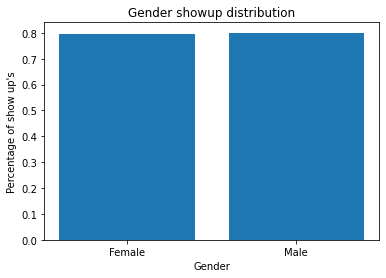

In [385]:
plt.bar(['Female', 'Male'], show_up_by_gender)
plt.xlabel('Gender')
plt.ylabel("Percentage of show up's")
plt.title("Gender showup distribution")
plt.show()

The difference isn't quite clear. Let's try a line plot

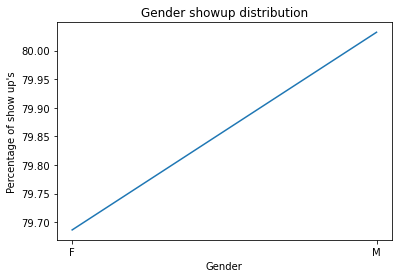

In [389]:
plt.plot(show_up_by_gender*100)
plt.xlabel('Gender')
plt.ylabel("Percentage of show up's")
plt.title("Gender showup distribution")

plt.show()

There. We see that roughly 80% of both genders showed up for their appointments with men showing up just slightly more

In [41]:
df_females = df_health.query("Gender== 'F'")

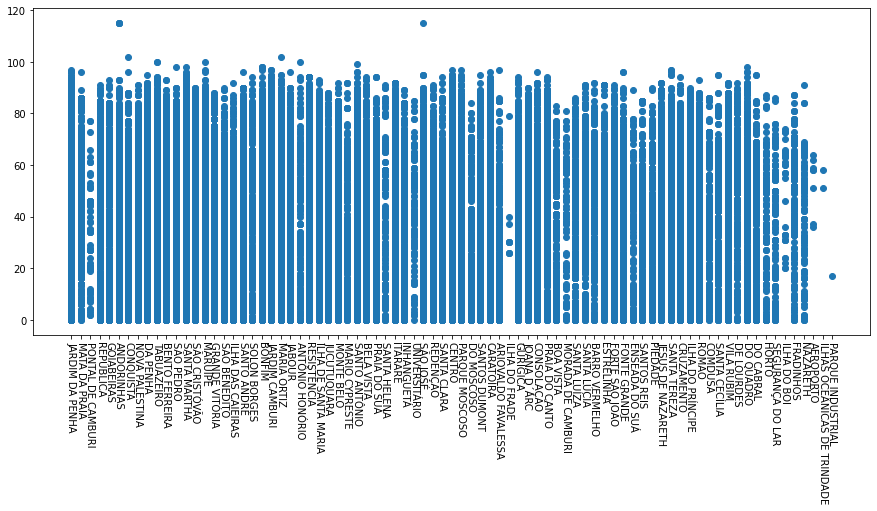

In [347]:
plt.subplots(figsize = (15, 6))
plt.scatter(x = df_health['Neighbourhood'], y = df_health['Age'])
plt.xticks(rotation = -90);

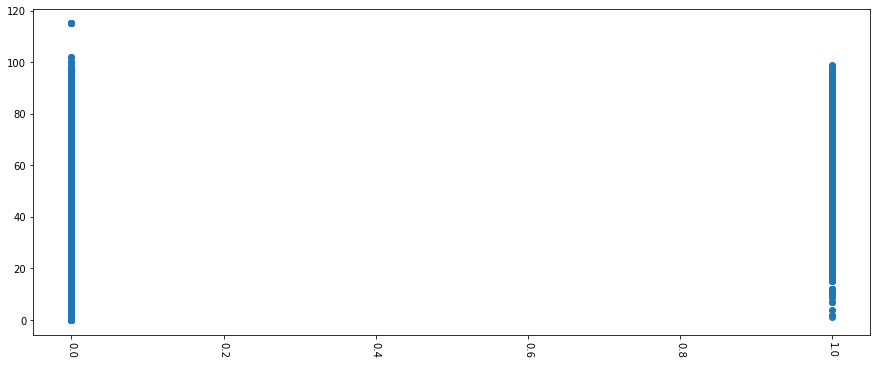

In [357]:
plt.subplots(figsize = (15, 6))
#plt.boxplot([df_health['Diabetes'], df_health['Age']]);
plt.scatter(x = df_health['Diabetes'], y = df_health['Age'])
plt.xticks(rotation = -90);

### Research Question 2:  What are the locations with the highest number of patients?

Here we want to find the neighborhood hospitals with the highest number of patients (Not appointments)

In [132]:
# Count number of unique patient IDs per neighbourhood
unique_patients_per_neighborhood = df_health.groupby('Neighbourhood')['PatientId'].nunique().sort_values(ascending = True)
unique_patients_per_neighborhood.sort_values(ascending=False)

Neighbourhood
JARDIM CAMBURI                 4192
MARIA ORTIZ                    3336
JARDIM DA PENHA                2406
RESISTÊNCIA                    2373
ITARARÉ                        2136
                               ... 
ILHA DO BOI                      22
AEROPORTO                         7
ILHA DO FRADE                     5
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: PatientId, Length: 81, dtype: int64

Let's see the highest 10

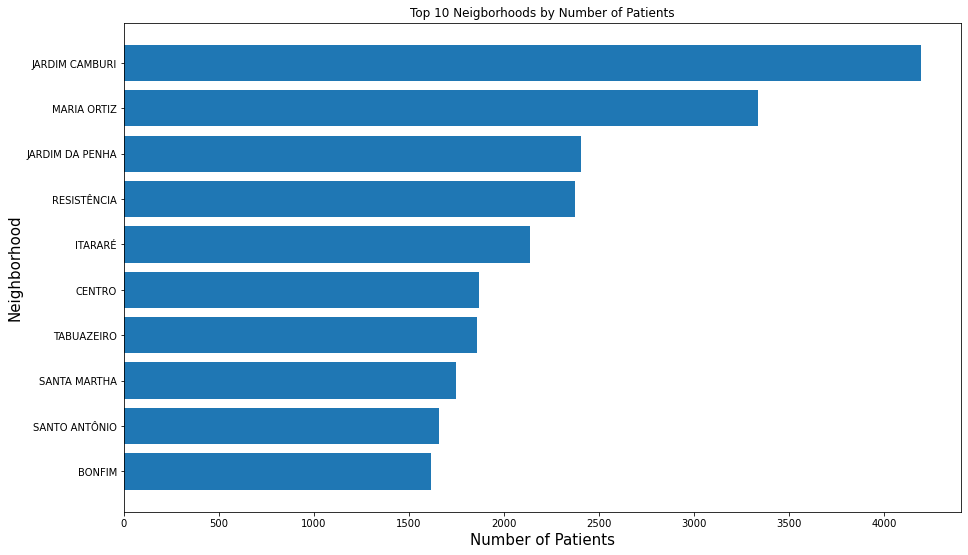

In [144]:
plt.subplots(figsize = (15, 9))
plt.barh(y = unique_patients_per_neighborhood[-10:].index, width = unique_patients_per_neighborhood[-10:])
plt.xlabel('Number of Patients',fontsize = 15)
plt.ylabel('Neighborhood', fontsize = 15)
plt.title('Top 10 Neigborhoods by Number of Patients');

So Jardim Camburi seems to be the busiest hospital

### Research Question 3: Which age group had the most appointments?


We already saw that women have more appointments than men. Quite reasonable since they have a wider variety of medical needs. However, Which age group came to hospital most often? Is it the grandparents? Lets find out.

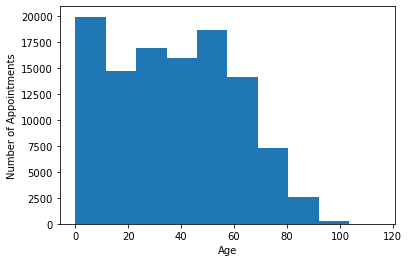

In [390]:
#A histogram will do the job for us
plt.hist(df_health['Age'])
plt.xlabel('Age')
plt.ylabel('Number of Appointments');

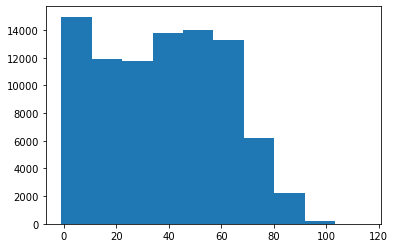

In [152]:
plt.hist(df_show_up['Age']);

We see that Chidren between the ages of 0 and 10 had the most appointments, followed by people between 50 and 60. So it isn't the grandparents, huh

### Research Question 4: Is any neighborhood associated with older or younger patients?


Let's see if there are any "old people's homes" included in our available list of hospital neighborhood. A scatterplot of age distribution should give us an idea

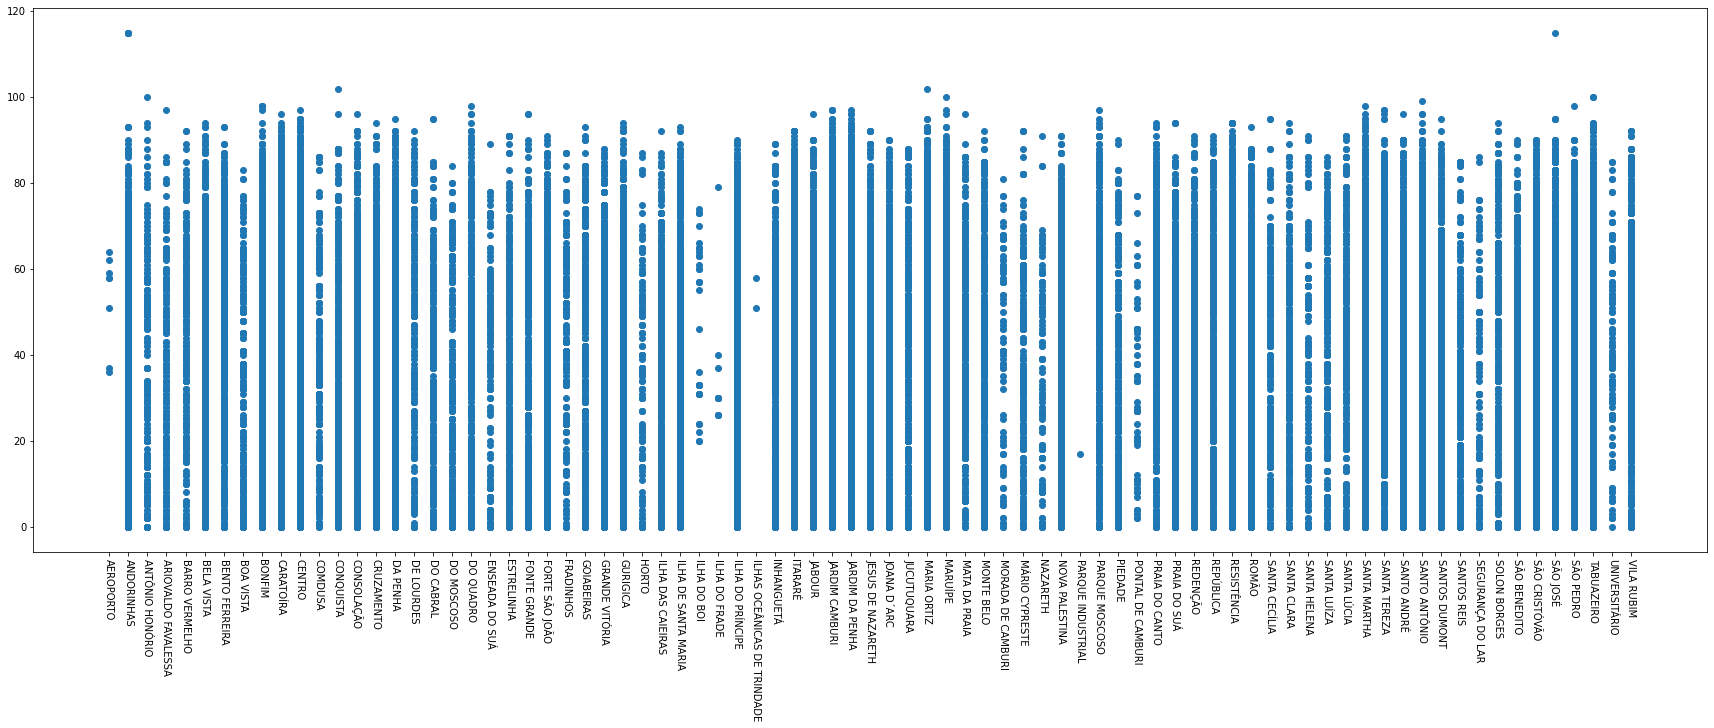

In [392]:
plt.subplots(figsize = (30, 10))
plt.scatter(x = df_health['Neighbourhood'].sort_values(), y = df_health.sort_values(by = 'Neighbourhood')['Age'])
plt.xticks(rotation = -90);

There doesn't seem to be any old people's homes as there isn't a distictly clear variation in age distribution between the hospitals

### Research Question 5: Were people enroled in the brazillian welfare program ('scholarship') more likely to show up for their appontments?


In [393]:
#This displays the percentage of appointments not showed up for, generally
(df_health['No_show'].value_counts()/len(df_health))*100

No     79.806561
Yes    20.193439
Name: No_show, dtype: float64

Don't get confused. If No_show is 'No', it means that the person did show up. If No_Show is 'Yes', the person didn't show up

In [394]:
df_scholarship = df_health.query( "Scholarship== 1 ")
scholarship_show = df_scholarship['No_show'].value_counts()/len(df_scholarship)
scholarship_show*100
#This displays the percentage of appointments either showed up for or not by people on the healthcare scheme

No     76.263696
Yes    23.736304
Name: No_show, dtype: float64

In [395]:
df_no_scholarship = df_health.query( "Scholarship== 0 ")
no_scholarship_show = df_no_scholarship['No_show'].value_counts()/len(df_no_scholarship)
no_scholarship_show.round(3)
#This displays the percentage of appointments either showed up for or not by people NOT on the healthcare scheme

No     0.802
Yes    0.198
Name: No_show, dtype: float64

Now let's represent this on a bar chart

I made a function to plot this kind of comparative graph since I used the same pattern more than once. Here it is

In [ ]:
def compare_bar(series_a, series_b, xlabel, ylabel, title, legend_a, legend_b):

    labels = list(series_a.index)
    positions = np.array(range(len(labels)))

    heights = list(series_a.values)
    width = 0.2
    
    plt.bar(positions + width/2, heights , tick_label = labels,
            width = width, label = legend_a )
    plt.legend();


    labels = list(series_b.index)
    positions = np.array(range(len(labels)))

    heights = list(series_b.values)
    width = 0.2
    plt.bar(positions + width*1.5, heights , tick_label = labels, 
            width = width, label = legend_b )
    plt.xlabel(xlabel, fontsize = 16)
    plt.xticks(rotation = 90)
    plt.ylabel(ylabel, fontsize = 16)
    plt.yticks(ticks = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], labels = [10,20,30,40,50,60,70,80,90]);
    plt.title(title, fontsize = 22)
    plt.legend();
    


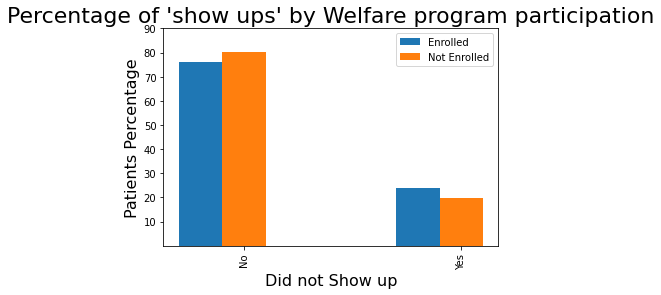

In [398]:
compare_bar(scholarship_show, scholarship_no_show, 'Did not Show up', 'Patients Percentage',
            "Percentage of 'show ups' by Welfare program participation", legend_a= 'Enrolled', legend_b='Not Enrolled')

80.2% of people who aren't enrolled in the welfare program showed up for their appointments. For people who were enrolled, the show up rate was 76.2%''So people who enrolled in the program did show up less. Not suprising at all.

### Research Question 6: Did people who received SMS show up more for their appointments? 


Here, we'll need to seperate those who received SMS from those who didn't

In [236]:
#Subset Dataframe of thosw who received sms
df_sms = df_health[df_health['SMS_received']== 1]

#Thiose who didn't receive is all others
df_no_sms = df_health.drop(index=df_sms.index)
received_sms = df_sms['No_show'].value_counts()/len(df_sms)

not_received_sms = df_no_sms['No_show'].value_counts()/len(df_no_sms)


In [342]:
received_sms
#This displayed the percentage of people who received sms. No means the person showed up

No     0.724255
Yes    0.275745
Name: No_show, dtype: float64

In [344]:
not_received_sms

No     0.832965
Yes    0.167035
Name: No_show, dtype: float64

Now, the bar plot

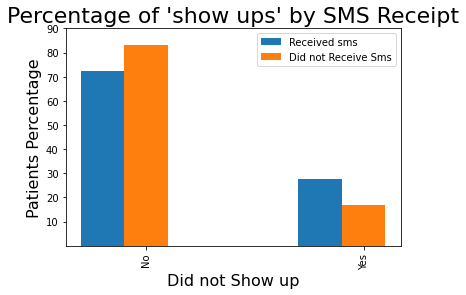

In [239]:
compare_bar(received_sms, not_received_sms, 'Did not Show up', 'Patients Percentage',
            "Percentage of 'show ups' by SMS Receipt", legend_a= 'Received sms', legend_b='Did not Receive Sms')

I honestly thought an SMS would make you more likely to show up for an appointment. Funny enough, that is not the case gere. People who received SMS showed up less frequently than people who didn't. Quite interesting

### Research Question 7: Which Neighborhood hospital had the most handicaps? Is there an indication that there is a special hospital for handicaps?


In [254]:
#Create new dataframe containing only patients who are handicaped
df_handicap = df_health[df_health["Handcap"] != 0]
df_health['Handcap'].value_counts()
df_handicap['Handcap'].value_counts()

count_handicap_per_neighborhood = df_handicap.groupby('Neighbourhood')['PatientId'].count().sort_values(ascending = True)
count_handicap_per_neighborhood.sort_values(ascending=False)

Neighbourhood
SANTA MARTHA       103
SANTO ANTÔNIO      101
RESISTÊNCIA         88
CENTRO              86
ANDORINHAS          81
                  ... 
MONTE BELO           2
SANTA LÚCIA          2
SANTOS REIS          1
ANTÔNIO HONÓRIO      1
COMDUSA              1
Name: PatientId, Length: 70, dtype: int64

In [299]:
no_of_handicaps_per_neigh = df_handicap.groupby('Neighbourhood')['PatientId'].nunique().sort_index()

In [300]:
no_of_patients = df_health.groupby('Neighbourhood')['PatientId'].nunique().sort_index()

In [316]:
percentage_handicap_by_neighborhood = (no_of_handicaps_per_neigh/no_of_patients).sort_values(ascending  = True)*100
percentage_handicap_by_neighborhood.dropna(inplace = True)

In [323]:
top_10_handicap_neigbhorhood = percentage_handicap_by_neighborhood[-10:]
top_10_handicap_neigbhorhood

Neighbourhood
GRANDE VITÓRIA    3.317536
SANTA MARTHA      3.434459
DO CABRAL         3.470032
ENSEADA DO SUÁ    3.546099
SANTA TEREZA      3.612903
BELA VISTA        4.043127
DE LOURDES        4.545455
ESTRELINHA        5.177994
DO QUADRO         5.611222
MATA DA PRAIA     7.493540
Name: PatientId, dtype: float64

Let's plot this

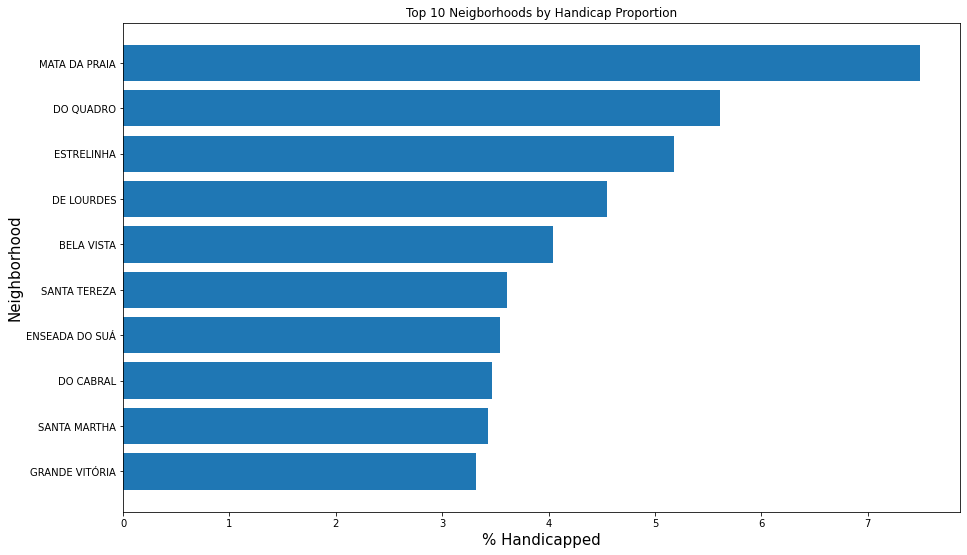

In [328]:
plt.subplots(figsize = (15, 9))
y = list(range(len([top_10_handicap_neigbhorhood])))
plt.barh(y = top_10_handicap_neigbhorhood.index, width = top_10_handicap_neigbhorhood)
plt.xlabel('% Handicapped',fontsize = 15)
plt.ylabel('Neighborhood', fontsize = 15)
plt.title('Top 10 Neigborhoods by Handicap Proportion');

MATA DA PRAIA has the highest proportion of handicapped patients, at 7.5%. This however isn't high enough to be distinctly indicative of specialisation on handicaps

<a id='conclusions'></a>
## Conclusions



> We saw that there were a lot more females than males visiting the hospitals. We saw that about 80% of the people showed up for their appointments. We saw that people enrolled in the medical welfare program tend to be less likely to make their appointments.
We also saw that people who received SMS were less likely to show up for their appointments (I really hope I didn't make a mistake here as this still shocks me.

> Parting Words: Please note that the conclusions made here are done within the limits of my budding expertise and growing understanding and so should not be held absolute